# Servette FC Data Analysis - KickOff Meeting 16.04.2024

Einführungstext

Ziel:
- Dokumentation der Visualisierung für das KickOff Meeting mit neuem Präsidenten SFC vom 16. April

Scope: Daten aus Transfermarkt

bsp:
**Introduction**
Brief introduction to the topic and its relevance to Servette FC.

**Objectives**
- Primary objectives of this analysis.
- Questions to answer or hypotheses to test.

**Data Source**
Description of the data source and data loading:
- '../data/cleaned/players_2022_2023_cleaned.csv'
- '../data/cleaned/players_2023_2024_cleaned.csv'
- playing_minutes_2022_2023
- playing_minutes_2023_2024

In [68]:
# Data Loading
import pandas as pd

# files needed for this script
players_2223 = pd.read_csv('../data/cleaned/players_2022_2023_cleaned.csv')
players_2324 = pd.read_csv('../data/cleaned/players_2023_2024_cleaned.csv') #last matchday scraped = tbd

playedmin_2223 = pd.read_csv('playing_minutes_2022_2023.csv')
playedmin_2324 = pd.read_csv('playing_minutes_2023_2024.csv') #last matchday scraped = tbd

In [69]:
## TODO quick overview of 'played-minutes' data files

In [43]:
#short overview of the data 2022/2023 regarding the players
print("quick snapshot of the data 2022/2023")
print(players_2223.shape)
print(players_2223.sample(10))
#print(players_2223.info())
print("amount of NaN values in the data 2022/2023")
print(players_2223.isnull().sum())
#descriptive statistics for the 2022/2023 season
print(players_2223.describe())



quick snapshot of the data 2022/2023
(370, 12)
                 Name          Position   Birthdate Height   Foot  \
289    Bendegúz Bolla    Right Midfield  1999-11-22  1,79m  right   
258       Akaki Gogia       Left Winger  1992-01-18  1,78m  right   
65         Samba Diba  Central Midfield  2003-12-24  1,90m  right   
70    Patrick Pflücke       Left Winger  1996-11-30  1,70m   left   
166      Thoma Monney       Centre-Back  2002-02-26  1,88m          
280       Teruki Hara        Right-Back  1998-07-30  1,80m  right   
1         Mirko Salvi        Goalkeeper  1994-02-14  1,88m  right   
187   Ibrahima Ndiaye       Left Winger  1998-07-06  1,76m   left   
310  Souleymane Diaby         Left-Back  1999-10-08  1,73m   left   
52        Baba Souare       Centre-Back  1999-03-07  1,93m   left   

    ContractBegin  ContractEnd  Value                     Club  Club_Number  \
289    2021-07-18          NaN   2.70  Grasshopper Club Zurich          504   
258    2021-07-28          NaN   0.

In [44]:
# show all distinct values in the column 'Club' and its count
print(players_2223['Club'].value_counts())

Club
FC Basel 1893              43
FC Lugano                  40
FC Luzern                  40
Servette FC                37
BSC Young Boys             37
FC Sion                    37
FC Zürich                  36
FC St. Gallen 1879         35
Grasshopper Club Zurich    33
FC Winterthur              32
Name: count, dtype: int64


**Insights**
data of season 2022/2023 has the following NaN:
- 31 NaN in `ContractBegin`
- 370 NaN in `ContractEnd`, i.e. no values in that column --> can't be used for the analysis regarding Contract Duration

everything else is complete

In [45]:
#short overview of the data 2023/2024
print("quick snapshot of the data 2023/2024")
print(players_2324.shape)
print(players_2324.sample(10))
#print(players_2324.info())
print("amount of NaN values in the data 2023/2024")
print(players_2324.isnull().sum())
#descriptive statistics for the 2023/2024 season
print(players_2324.describe())

quick snapshot of the data 2023/2024
(360, 12)
                    Name            Position   Birthdate Height   Foot  \
123  Giovanni D'Agostino      Centre-Forward  2004-08-27      -  right   
293       Magnus Grødem   Attacking Midfield  1998-08-14  1,93m  right   
98          Leonid Srdic         Centre-Back  2002-01-23  1,85m  right   
139      Antoine Bernede    Central Midfield  1999-05-26  1,78m  right   
37          Jérémy Frick          Goalkeeper  1993-03-08  1,92m   left   
348           Musa Araz     Central Midfield  1994-01-17  1,73m   left   
66    David von Ballmoos          Goalkeeper  1994-12-30  1,92m  right   
121     Kacper Przybylko      Centre-Forward  1993-03-25  1,92m  right   
43        Anthony Baron          Centre-Back  1992-12-29  1,80m   left   
31        Maurice Malone      Centre-Forward  2000-08-17  1,87m   left   

    ContractBegin   ContractEnd  Value               Club  Club_Number  Age  \
123   Jul 1, 2023  Jun 30, 2024    0.1          FC Lugano  

In [46]:
# show the 9 NaN values in the col 'ContractEnd' in 2023/2024
players_2324[players_2324.isnull().any(axis=1)]


,Name,Position,Birthdate,Height,Foot,ContractBegin,ContractEnd,Value,Club,Club_Number,Age,Season
99,Noah De Queiroz,Centre-Back,2002-12-10,"1,82m",right,NaN,"Jun 30, 2024",0.1,FC Lugano,2790,21,2023_2024
106,Ilija Maslarov,Defensive Midfield,2007-01-02,"1,81m",right,NaN,"Jun 30, 2024",0.2,FC Lugano,2790,17,2023_2024
113,Gianluca Pizzagalli,Right Midfield,2003-03-10,"1,77m",right,NaN,"Jun 30, 2024",0.1,FC Lugano,2790,21,2023_2024
195,Corsin Konietzke,Defensive Midfield,2006-06-21,"1,85m",right,NaN,"Jun 30, 2024",0.2,FC St. Gallen 1879,257,17,2023_2024
206,Albin Krasniqi,Right Winger,2003-04-06,"1,80m",right,NaN,"Jun 30, 2024",0.5,FC St. Gallen 1879,257,21,2023_2024
238,Labinot Bajrami,Centre-Forward,2005-06-04,"1,87m",right,NaN,"Jun 30, 2024",0.4,FC Zürich,260,18,2023_2024
248,Elvir Zukaj,Centre-Back,2002-07-07,"1,94m",right,NaN,-,0.1,Grasshopper Club Zurich,504,21,2023_2024
257,Noah Blasucci,Central Midfield,1999-06-19,"1,75m",right,NaN,"Jun 30, 2024",0.1,Grasshopper Club Zurich,504,24,2023_2024
266,Damian Nigg,Left Winger,2005-04-12,"1,78m",right,NaN,"Jun 30, 2024",0.2,Grasshopper Club Zurich,504,18,2023_2024


In [47]:
# show all distinct values in the column 'Club' and its count
print(players_2324['Club'].value_counts())

Club
FC Basel 1893              36
FC Lugano                  34
Yverdon Sport FC           34
Grasshopper Club Zurich    31
FC Luzern                  30
FC St. Gallen 1879         30
Servette FC                29
FC Zürich                  29
FC Winterthur              28
FC Lausanne-Sport          27
FC Stade-Lausanne-Ouchy    27
BSC Young Boys             25
Name: count, dtype: int64


Insights: data of season 2023/2024 has the following NaN:
- 9 NaN in `ContractBegin` --> non of them are Servette FC players (3x Lugano, 2x St. Gallen, 1x FCZ, 3x GC)

everything else is complete

In [48]:
# Analysis 1: [Topic Name, e.g., "Players Contract vs Age"]

## 1.1 Servette FC Analysis
### Short introduction to the analysis (2-3 lines, what is the analysis about)

### Data Source
#- used data source, e.g., "FIFA 21 Player Dataset".
#- used data variables, e.g., "Player Name, Age, Contract End Year, etc."

### Data Preparation
#- Steps to prepare and clean the data specific to Servette FC.

### Descriptive Statistics
#- Summary statistics that provide insight into the dataset.

### Visualizations
#- Visualizations relevant to Servette FC.
#- Interpretations from the visualizations.

### Insights and Recommendations
#- Key findings.
#- Strategic recommendations based on the analysis.


## 1. Analysis I: Servette FC

Kurze Einführung

### 1.1 Contract vs Duration (current)

**Notes**:
- Datasource `players_2023_2024_cleaned`
- Data from last season (`players_2022_2023_cleaned`) can't be used here due to missing values for Contract End
- ...

This visualization provides a comprehensive view of the contract durations for the players of Servette FC for the current season. By displaying the age at which each player began their contract (`ContractBegin`) against their age at the end of the contract (`ContractEnd`), along with their current age, we can assess several important factors:

- **Player Lifecycle**: Understanding at what age players are typically signed and how long they stay with the club.
- **Future Planning**: Identifying potential gaps in the squad that may arise as a cluster of contracts end around the same time.
- **Age Profile**: Examining the age profile of the team’s assets to ensure a good balance between youth and experience.

This visualization aids the management and coaching staff in strategic planning, contract negotiations, and maintaining a balanced and competitive squad.

#### 1.1.1 Data Preprocessing

In [57]:
# Filter the DataFrame for only Servette FC players
df_servette_2324 = players_2324[players_2324['Club'] == 'Servette FC'].copy()

# Convert the 'Birthdate', 'ContractBegin', and 'ContractEnd' to datetime objects
df_servette_2324['Birthdate'] = pd.to_datetime(df_servette_2324['Birthdate'], errors='coerce')
df_servette_2324['ContractBegin'] = pd.to_datetime(df_servette_2324['ContractBegin'], format='%b %d, %Y', errors='coerce')
df_servette_2324['ContractEnd'] = pd.to_datetime(df_servette_2324['ContractEnd'], format='%b %d, %Y', errors='coerce')

# Calculate the age at contract begin and contract end
df_servette_2324['AgeAtContractStart'] = df_servette_2324['ContractBegin'].dt.year - df_servette_2324['Birthdate'].dt.year
df_servette_2324['AgeAtContractEnd'] = df_servette_2324['ContractEnd'].dt.year - df_servette_2324['Birthdate'].dt.year

df_servette_2324

,Name,Position,Birthdate,Height,Foot,ContractBegin,ContractEnd,Value,Club,Club_Number,Age,Season,AgeAtContractStart,AgeAtContractEnd
36,Joël Mall,Goalkeeper,1991-04-05,"1,97m",right,2023-07-01,2025-06-30,0.5,Servette FC,61,33,2023_2024,32,34
37,Jérémy Frick,Goalkeeper,1993-03-08,"1,92m",left,2016-07-01,2027-06-30,0.5,Servette FC,61,31,2023_2024,23,34
38,Léo Besson,Goalkeeper,2002-10-27,"1,87m",right,2023-04-08,2026-06-30,0.1,Servette FC,61,21,2023_2024,21,24
39,Yoan Severin,Centre-Back,1997-01-24,"1,86m",left,2018-07-17,2026-06-30,1.5,Servette FC,61,27,2023_2024,21,29
40,Dylan Bronn,Centre-Back,1995-06-19,"1,86m",right,2024-02-15,2024-06-30,1.5,Servette FC,61,28,2023_2024,29,29
41,Omar Rekik,Centre-Back,2001-12-20,"1,88m",right,2024-02-01,2024-06-30,0.5,Servette FC,61,22,2023_2024,23,23
42,Jérôme Onguéné,Centre-Back,1997-12-22,"1,86m",right,2023-08-04,2024-06-30,0.5,Servette FC,61,26,2023_2024,26,27
43,Anthony Baron,Centre-Back,1992-12-29,"1,80m",left,2022-07-20,2024-06-30,0.3,Servette FC,61,31,2023_2024,30,32
44,Steve Rouiller,Centre-Back,1990-07-10,"1,83m",right,2018-07-01,2025-06-30,0.2,Servette FC,61,33,2023_2024,28,35
45,Bradley Mazikou,Left-Back,1996-06-02,"1,72m",right,2023-07-01,2025-06-30,1.4,Servette FC,61,27,2023_2024,27,29


In [56]:
df_servette_2324.shape

(29, 14)

In [65]:
# since we might need 'Birthday', 'ContractBegin', 'ContractEnd' also in the dataset of last season, we will add them to the dataset of 2022/2023
# Filter the DataFrame for only Servette FC players
df_servette_2223 = players_2223[players_2223['Club'] == 'Servette FC'].copy()

# Convert the 'Birthdate', 'ContractBegin', and 'ContractEnd' to datetime objects
df_servette_2223['Birthdate'] = pd.to_datetime(df_servette_2223['Birthdate'], errors='coerce')
df_servette_2223['ContractBegin'] = pd.to_datetime(df_servette_2223['ContractBegin'], format='%b %d, %Y', errors='coerce')
df_servette_2223['ContractEnd'] = pd.to_datetime(df_servette_2223['ContractEnd'], format='%b %d, %Y', errors='coerce')


Now we're ready, no missing values - great :)

#### 1.1.2 Visualization (ShittyFirstDraft)

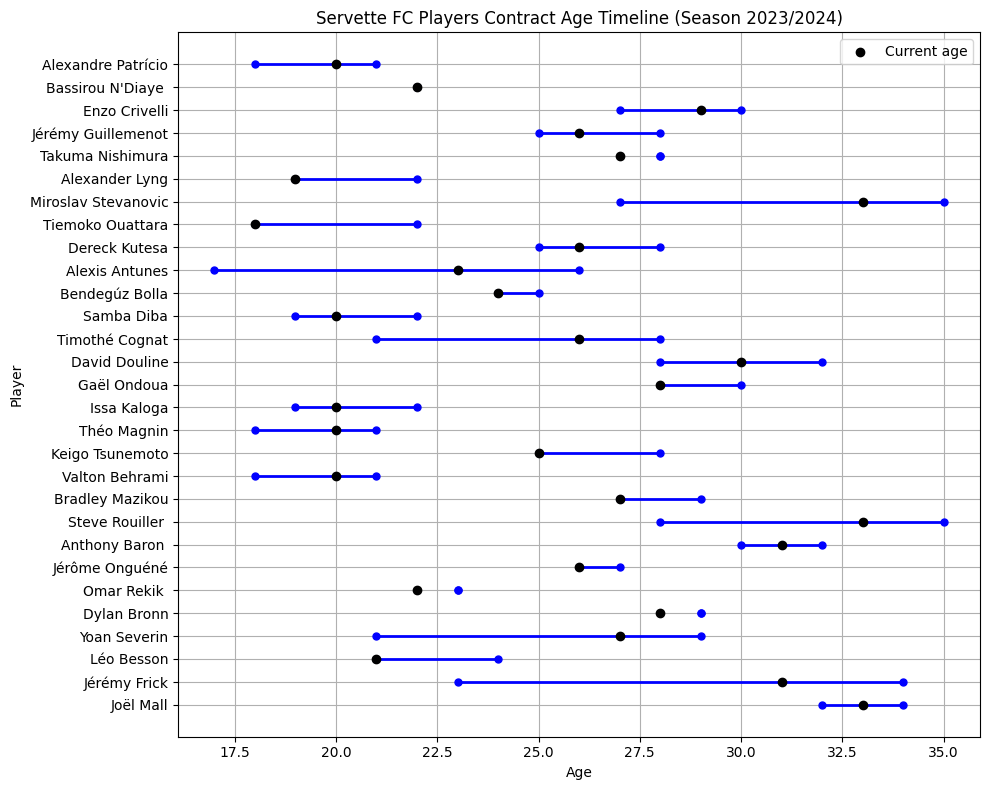

In [62]:
plt.figure(figsize=(10, 8))
for _, row in df_servette_2324.iterrows():
    plt.plot([row['AgeAtContractStart'], row['AgeAtContractEnd']], [row['Name'], row['Name']], 
             marker='o', markersize=5, linestyle='-', linewidth=2, label='_nolegend_', color='blue')

# Adding current age as a marker
plt.scatter(df_servette_2324['Age'], df_servette_2324['Name'], color='black', zorder=5, label='Current age')

plt.xlabel('Age')
plt.ylabel('Player')
plt.title('Servette FC Players Contract Age Timeline (Season 2023/2024)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



### 1.2 Marketvalue vs Age

This visualization aims to compare the market value of Servette FC players against their age. We will plot data from two seasons — 2022/2023 and 2023/2024 — to observe changes and trends over time. This analysis can help in understanding how a player's value evolves with age and can be crucial for financial planning and transfer strategies. A player's peak market value often correlates with their peak performance years, and tracking this can aid in making informed decisions about contract negotiations, player sales, and acquisitions.

**Notes**:
- Datasource `players_2022_2023_cleaned` and `players_2023_2024_cleaned`

#### 1.2.1 Data Preprocessing

In [64]:
# show amount of NaN in the column 'Value' for 2022/2023 and 2023/2024
print("Amount of NaN in the column 'Value' for 2022/2023")
print(players_2223['Value'].isnull().sum())
print("*"*50)
print("Amount of NaN in the column 'Value' for 2023/2024")
print(players_2324['Value'].isnull().sum())


Amount of NaN in the column 'Value' for 2022/2023
0
**************************************************
Amount of NaN in the column 'Value' for 2023/2024
0


No Data Preprocessing needed

#### 1.2.2 Visualization (ShittyFirstDraft)

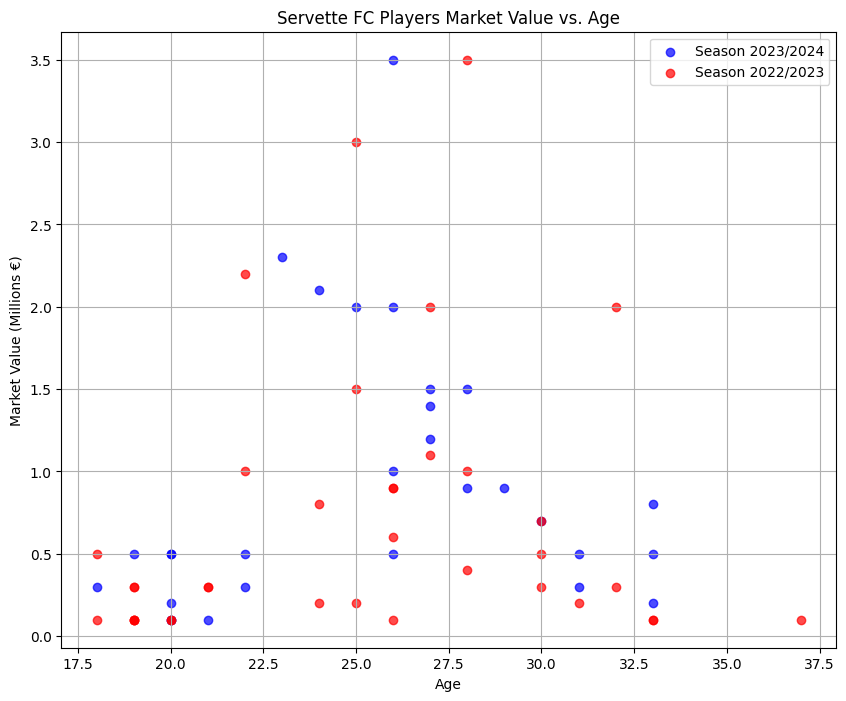

In [67]:
# Visualize the data
plt.figure(figsize=(10, 8))
# Plot for season 2023/2024
plt.scatter(df_servette_2324['Age'], df_servette_2324['Value'], color='blue', label='Season 2023/2024', alpha=0.7)
# Plot for season 2022/2023
plt.scatter(df_servette_2223['Age'], df_servette_2223['Value'], color='red', label='Season 2022/2023', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Market Value (Millions €)')
plt.title('Servette FC Players Market Value vs. Age')
plt.legend()
plt.grid(True)
plt.show()

**Improvements to Do**
- only take the players that have a critical number of played minutes (otherwise to many data points)
- only take the players that have been at Servette for both seasons (otherwise can't compare it/no additional value)
- add the name of the player in the scatterplot (otherwise too less information in the plot)

## 2. Analysis II: Servette FC vs BSC Young Boys

Kurze Einführung

### 2.1 Share of Played Minutes per Age Category (current season)

This visualization represents the distribution of played minutes among different age categories for Servette FC and BSC Young Boys for the current season. The age categories are divided as follows: 
- under 20
- 20-23
- 24-29
- 30+

By comparing the minutes played across these age groups, we can derive insights into:
- The youth development focus of each club by looking at minutes allocated to younger players.
- The reliance on experienced players by observing the minutes given to the older age groups.
- The overall age-based squad utilization strategy which might indicate the club's long-term planning and investment in players of various ages.


#### 2.1.1 Data Preprocessing

In [75]:
playedmin_2324.sample(10)

,Player,Minutes Played,Starting,Substitute,Substituted In,Substituted Out,Position,Age,Market Value,Club
214,Linus Obexer,517,7,4,2,4,Left-Back,26,NaN,FC Stade-Lausanne-Ouchy
256,Michael Heule,400,4,9,4,2,Left-Back,22,NaN,FC Stade-Lausanne-Ouchy
68,Chima Okoroji,1184,12,15,9,7,Left-Back,26,NaN,FC St. Gallen 1879
290,Nicolas Vouilloz,1618,16,13,8,2,Centre-Back,22,NaN,Servette FC
126,Francis Momoh,1303,14,10,8,10,Centre-Forward,23,NaN,Grasshopper Club Zurich
42,Ayman El Wafi,910,9,21,5,3,Centre-Back,19,NaN,FC Lugano
159,Jean-Pierre Nsame,1036,12,7,6,10,Centre-Forward,30,NaN,BSC Young Boys
373,Thomas Castella,450,5,23,0,0,Goalkeeper,30,NaN,FC Lausanne-Sport
258,Michael Lang,340,3,18,5,2,Right-Back,33,NaN,FC Basel 1893
233,Marc Hornschuh,92,0,24,9,0,Centre-Back,33,NaN,FC Zürich


In [77]:
# filter the data for Servette FC and BSC YB
playedmin_2324_sfc_yb = playedmin_2324[(playedmin_2324['Club'] == 'Servette FC') | (playedmin_2324['Club'] == 'BSC Young Boys')].copy()
playedmin_2324_sfc_yb

,Player,Minutes Played,Starting,Substitute,Substituted In,Substituted Out,Position,Age,Market Value,Club
14,Alexander Lyng,0,0,8,0,0,Right Winger,19,NaN,Servette FC
16,Alexis Antunes,1508,18,6,4,13,Attacking Midfield,23,NaN,Servette FC
25,Anthony Baron,737,8,11,3,2,Centre-Back,31,NaN,Servette FC
26,Anthony Racioppi,1350,15,16,0,0,Goalkeeper,25,NaN,BSC Young Boys
39,Aurèle Amenda,1521,17,13,1,1,Centre-Back,20,NaN,BSC Young Boys
...,...,...,...,...,...,...,...,...,...,...
376,Tiemoko Ouattara,0,0,12,0,0,Left Winger,18,NaN,Servette FC
379,Timothé Cognat,2505,29,1,1,9,Central Midfield,26,NaN,Servette FC
385,Ulisses Garcia,882,9,5,5,3,Left-Back,27,NaN,BSC Young Boys
389,Vasco Tritten,0,0,1,0,0,Attacking Midfield,18,NaN,Servette FC


In [78]:
#categorize the age into 4 groups: <20, 20-23, 24-29, 30+
bins = [0, 20, 23, 29, 100]
labels = ['<20', '20-23', '24-29', '30+']
playedmin_2324_sfc_yb['AgeGroup'] = pd.cut(playedmin_2324_sfc_yb['Age'], bins=bins, labels=labels, right=False)

# Calculate the total minutes played by each age group
age_group_minutes = playedmin_2324_sfc_yb.groupby('AgeGroup')['Minutes Played'].sum()

age_group_minutes

C:\Users\arnol\AppData\Local\Temp\ipykernel_27660\2229143329.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_minutes = playedmin_2324_sfc_yb.groupby('AgeGroup')['Minutes Played'].sum()


AgeGroup
<20        107
20-23     8903
24-29    38088
30+      14751
Name: Minutes Played, dtype: int64

In [ ]:
## TODO: Visualize the data

## 3. Analysis III: Super League Comparison

Kurzeinführung

### 3.1 Stability Index vs. Average Points

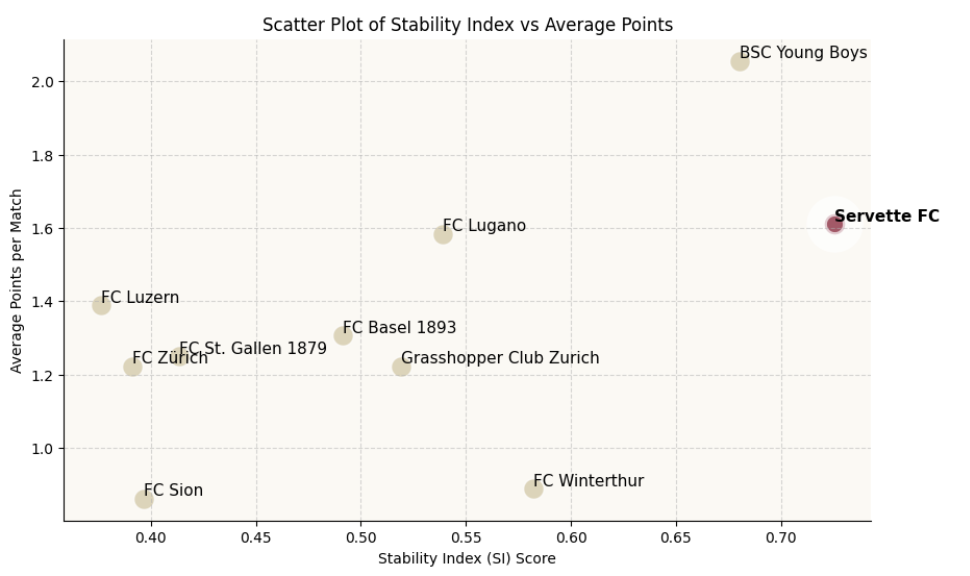

**Work in progress**

todo's:
- visualize it for current season
- explaination Stability index and interpretation of the results

In [ ]:
## Conclusion
#- Recap of the main findings from all sections.
#- Final recommendations and strategic insights for Servette FC.

## Appendix
#- Additional data, code, or queries used in the notebook.

## References
#- Sources of data and other referenced materials in the analysis.